# TSP env test

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
from envs.tsp_env import TSPProblem

In [5]:
# build tsp20 env
graph_size = 20
seed = 9527
tsp_env = TSPProblem(graph_size, seed)

In [6]:
# generate and save a dataset for testing
filename = tsp_env.generate_test_dataset(dataset_size=1000)

Generate test dataset at: test_dataset/tsp20_1000_seed9527.pkl


In [7]:
# load testing dataset
test_dataset = tsp_env.load_test_dataset(filename)
print(test_dataset.shape, test_dataset.dtype)

(1000, 20, 2) float64


----

Generate a batch of data for training, for (Kool 2019), we need 100 * 2500 batchs with batch size 512

In [8]:
batch_size = 5
batch_data = tsp_env.generate_batch_data(batch_size)
print(batch_data.shape, batch_data.dtype)
batch_data[0:1]

(5, 20, 2) float64


array([[[0.58472605, 0.77213639],
        [0.44188461, 0.90704489],
        [0.47225225, 0.95024043],
        [0.27868954, 0.79736808],
        [0.446028  , 0.30585614],
        [0.11024534, 0.42661856],
        [0.81364312, 0.48594524],
        [0.82770144, 0.19819943],
        [0.9588093 , 0.81343162],
        [0.02449656, 0.26852982],
        [0.27929895, 0.49616576],
        [0.26070941, 0.68165713],
        [0.61482743, 0.65997056],
        [0.63815316, 0.13658672],
        [0.97536661, 0.53419899],
        [0.67728077, 0.04447597],
        [0.84320241, 0.37256133],
        [0.89639069, 0.02921846],
        [0.14989518, 0.31055921],
        [0.55511907, 0.2871857 ]]])

---

Now we load some samples to compute cost

In [15]:
def load_sample_data(loadpath):
    with open(loadpath, 'rb') as f:
        return pickle.load(f)
    
loadpath = "sample_data/tsp20.pkl"
tsp20_samples = load_sample_data(loadpath)
print(len(tsp20_samples))

# batch_size = 1
single_sample = tsp20_samples[-1]
single_sample

15


{'loc': array([[[0.7267589 , 0.050111  ],
         [0.5918277 , 0.08091176],
         [0.74291384, 0.9474115 ],
         [0.26013982, 0.94845957],
         [0.05228394, 0.73860776],
         [0.5850891 , 0.38552594],
         [0.43094736, 0.6998186 ],
         [0.40889496, 0.01637006],
         [0.31938422, 0.92413485],
         [0.06944054, 0.33144957],
         [0.70635176, 0.8655757 ],
         [0.12403613, 0.15400589],
         [0.80163723, 0.84009814],
         [0.82523423, 0.7870205 ],
         [0.07368028, 0.66483754],
         [0.4818908 , 0.5767726 ],
         [0.30885577, 0.9837699 ],
         [0.4729048 , 0.15779567],
         [0.75905746, 0.4895082 ],
         [0.18830168, 0.2790274 ]]], dtype=float32),
 'solution': array([[ 0,  5, 18, 13, 12,  2, 10, 15,  6,  8, 16,  3,  4, 14,  9, 19,
         11,  7, 17,  1]]),
 'cost': array([3.7395031], dtype=float32)}

In [17]:
inputs_batch1 = single_sample['loc']
selected_idxs_batch1 = single_sample['solution']
cost = tsp_env.compute_cost(inputs_batch1, selected_idxs_batch1)
cost

array([3.7395031], dtype=float32)

---

Let's build a batch of 5 samples

In [22]:
inputs_list = [sample['loc'] for sample in tsp20_samples[:5]]
inputs_batch5 = np.concatenate(inputs_list)
print(inputs_batch5.shape)
selected_idxs_list = [sample['solution'] for sample in tsp20_samples[:5]]
selected_idxs_batch5 = np.concatenate(selected_idxs_list)
print(selected_idxs_batch5.shape)
costs_pretrainedAM = np.concatenate([sample['cost'] for sample in tsp20_samples[:5]])
print(costs_pretrainedAM)

(5, 20, 2)
(5, 20)
[3.366598  3.942869  4.2315903 4.392281  4.3160377]


In [23]:
cost_batch5 = tsp_env.compute_cost(inputs_batch5, selected_idxs_batch5)
print(cost_batch5)

[3.366598  3.9428687 4.23159   4.3922815 4.3160377]


---

Now let's visualize the route. Here we limit the batch_size as 1

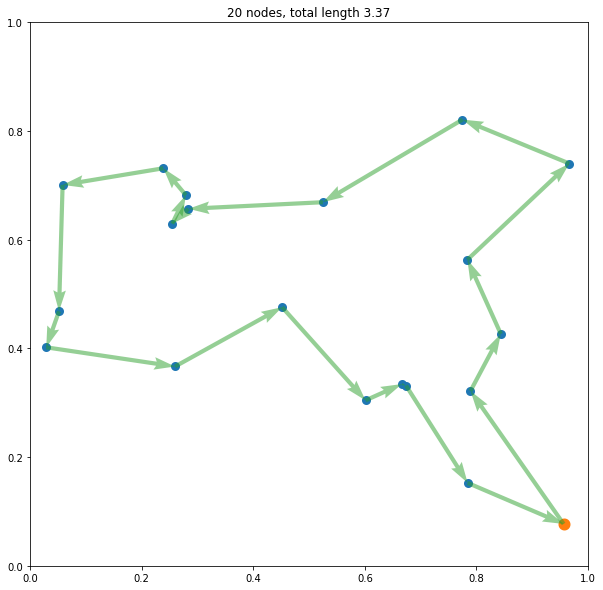

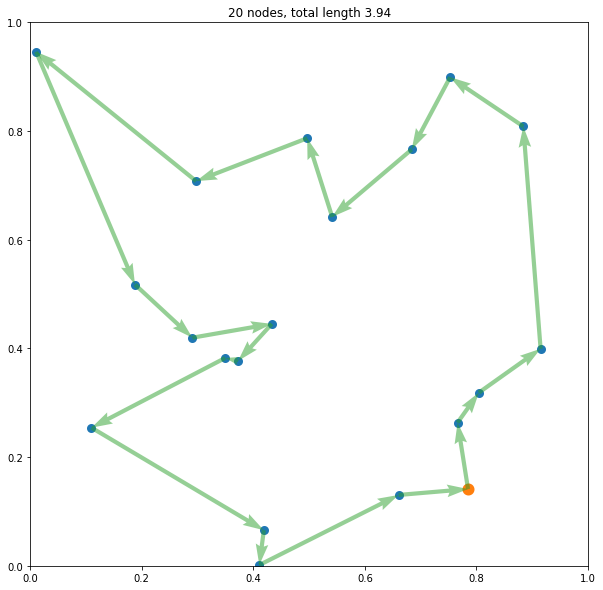

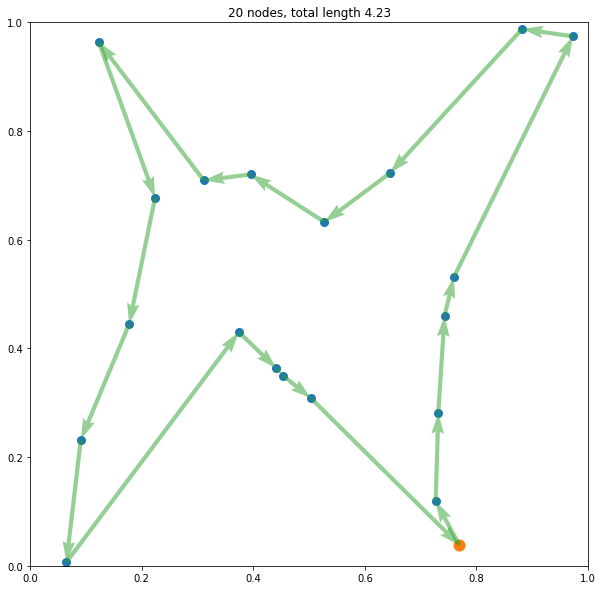

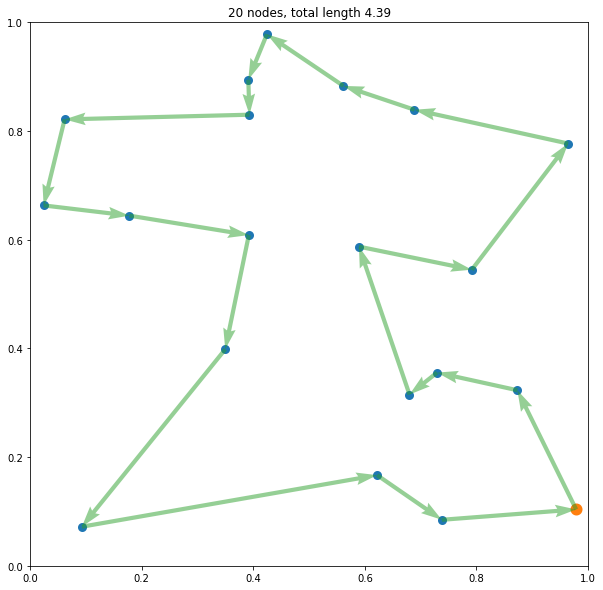

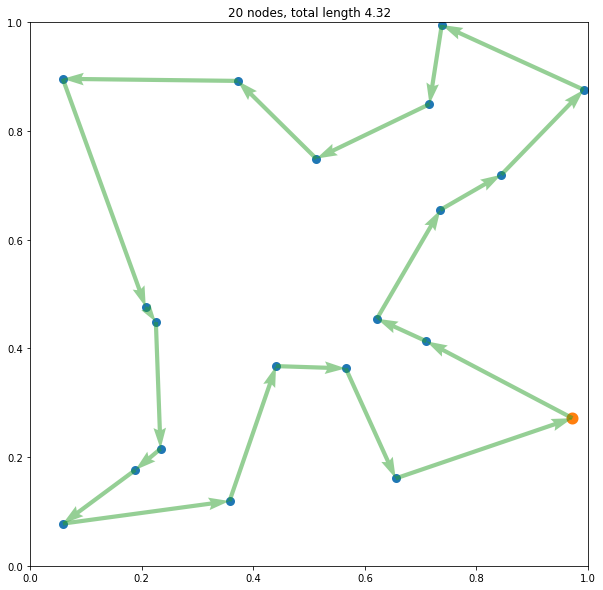

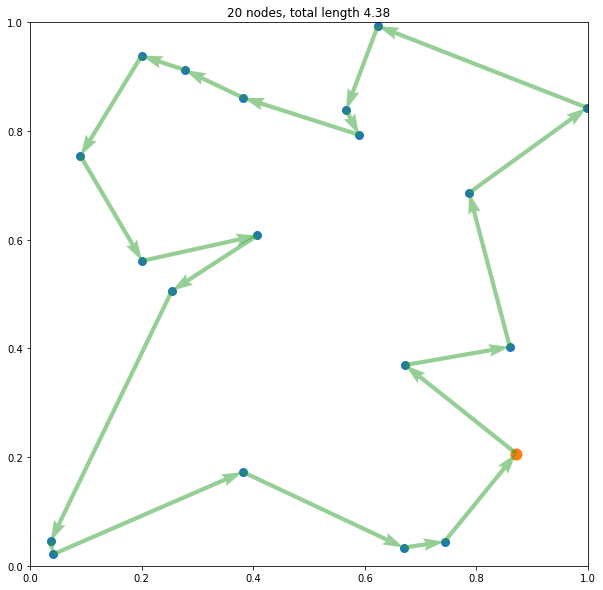

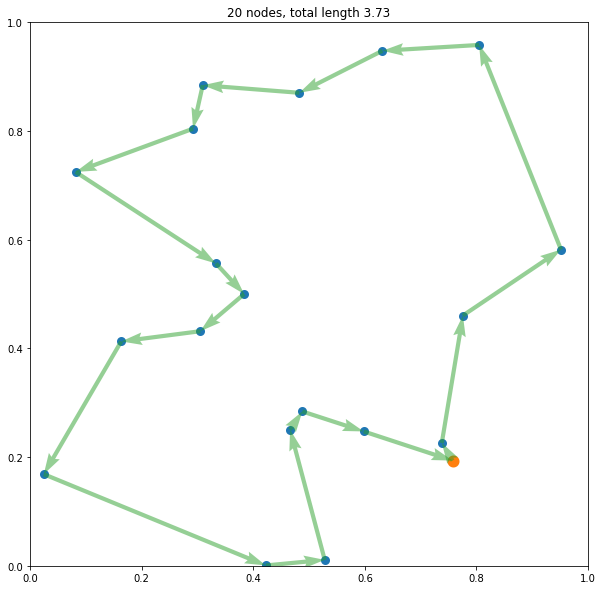

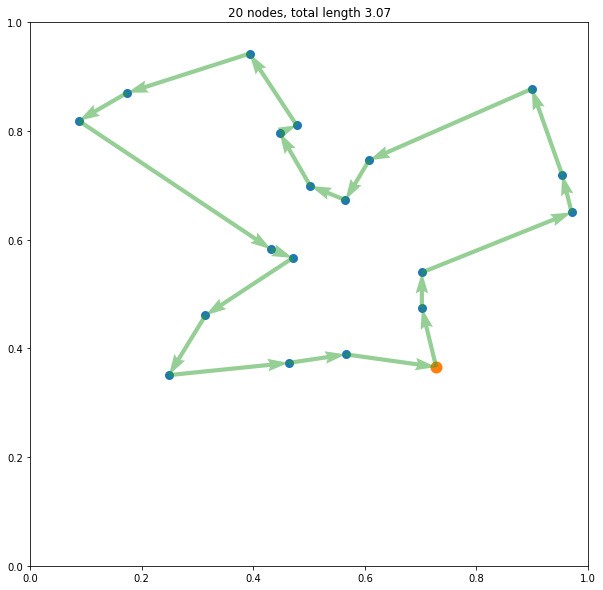

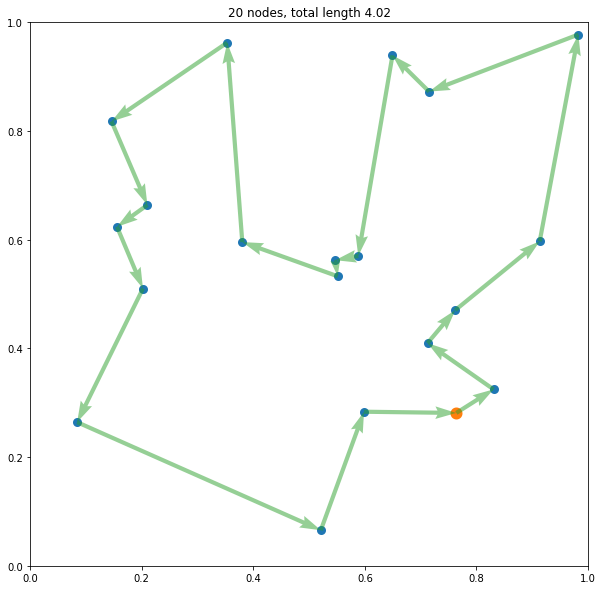

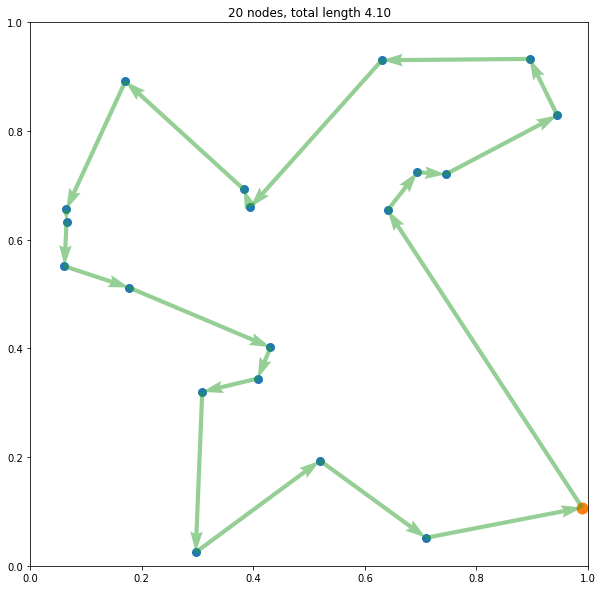

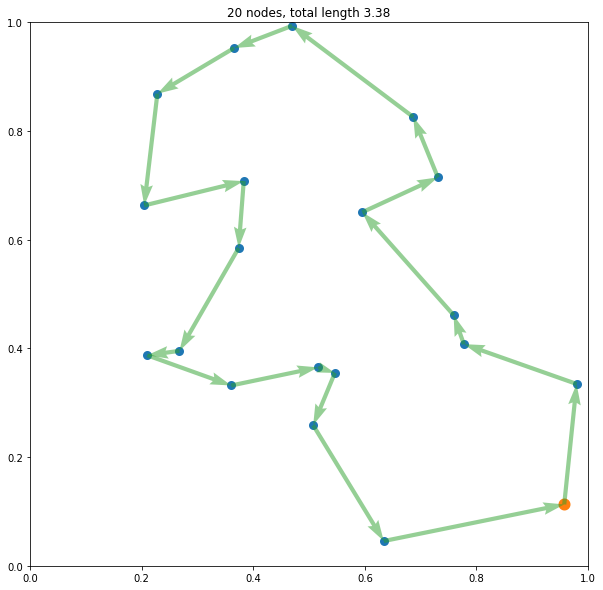

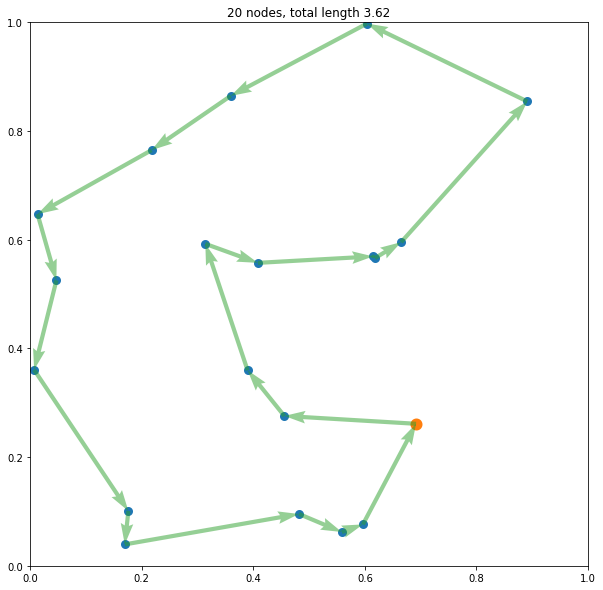

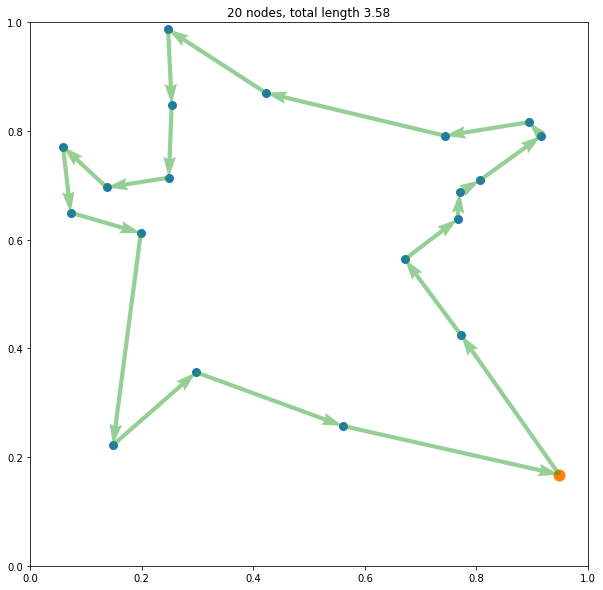

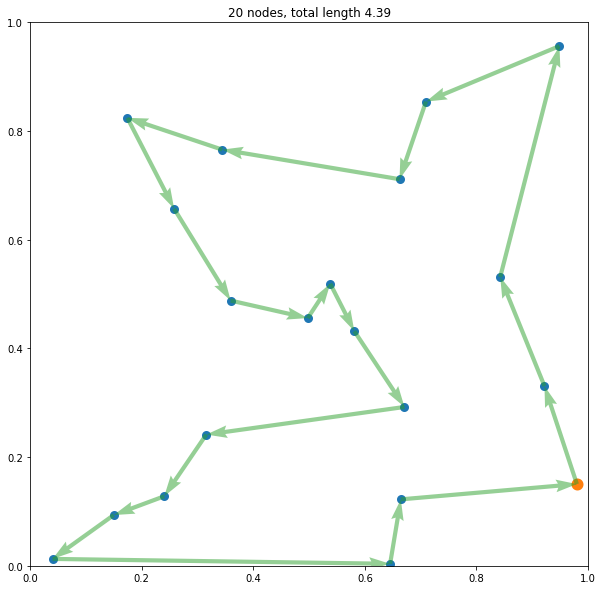

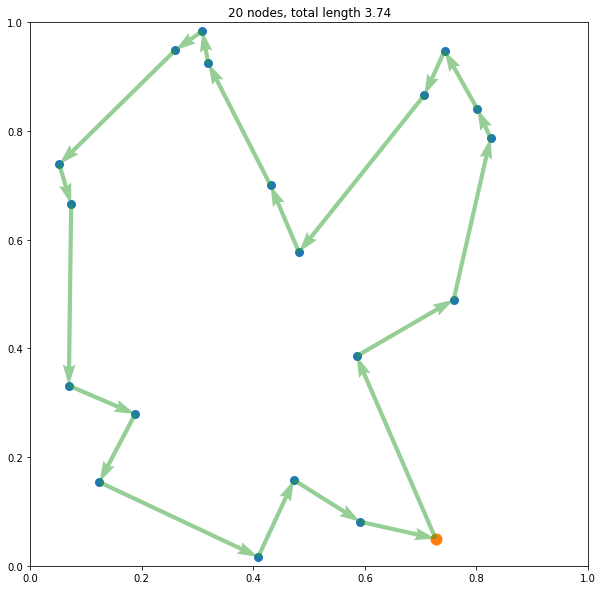

In [24]:
for i in range(len(tsp20_samples)):
    curr_sample = tsp20_samples[i]
    tsp_env.plot(curr_sample['loc'], curr_sample['solution'], savepath=None)
    print("==========")